# Libraries

In [ ]:
import warnings

warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", DeprecationWarning)

In [ ]:
import html

In [ ]:
import os
import pandas as pd

In [ ]:
import re
import nltk

In [ ]:
pip install pyLDAvis

In [ ]:
import missingno as mnso

In [ ]:
pip install emoji

#Data upload

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving base reviews.csv to base reviews.csv


In [ ]:
import pandas as pd
review_file = 'base reviews.csv'
df = pd.read_csv(review_file)

#Data exploration

In [ ]:
df=df.astype(str)

In [ ]:
display(df.head(10))

,Unnamed: 0,Restaurante,Location,Details,Name,Rating,Date Rate,Review
0,0,Bajel,Av. Paseo de la Reforma 297,Alta cocina,Sandrine Dupriez,5,hace 11 meses,El menu del Bajel es una garantía para los pal...
1,1,Bajel,Av. Paseo de la Reforma 297,Alta cocina,Ophélie de Dépasse tes Frontières,5,hace 9 meses,Desde la puerta de entrada hasta el postre la ...
2,2,Bajel,Av. Paseo de la Reforma 297,Alta cocina,Joaquín Précoma,5,hace 9 meses,El mejor restaurante en el que he estado en DF...
3,3,Bajel,Av. Paseo de la Reforma 297,Alta cocina,Ensayos Clinicos,5,2 semanas atrás,DELICIOSO
4,4,Bajel,Av. Paseo de la Reforma 297,Alta cocina,Emma Josephine,5,hace 10 meses,Un placer para el paladar y la vista. Delicios...
5,5,Bajel,Av. Paseo de la Reforma 297,Alta cocina,Chantal Berlie,5,hace 9 meses,Muy buena experiencia. Muy buen servicio y la ...
6,6,Bajel,Av. Paseo de la Reforma 297,Alta cocina,David R. Parrish B.,5,hace 10 meses,Exquisita cocina mexicana
7,7,Bajel,Av. Paseo de la Reforma 297,Alta cocina,Viridiana Vargas,5,hace 10 meses,"Wow espectacular el menú de degustación, delic..."
8,8,Bajel,Av. Paseo de la Reforma 297,Alta cocina,Jose de Jesus Reyes Cortes,5,hace 11 meses,STELLAR!!!\nIncreíble experiencia. Aunque el c...
9,9,Bajel,Av. Paseo de la Reforma 297,Alta cocina,Pol Picas Companyó,5,hace 11 meses,() Probé este restaurante el día de Navidad. C...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28087 entries, 0 to 28086
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   28087 non-null  object
 1   Restaurante  28087 non-null  object
 2   Location     28087 non-null  object
 3   Details      28087 non-null  object
 4   Name         28087 non-null  object
 5   Rating       28087 non-null  object
 6   Date Rate    28087 non-null  object
 7   Review       28087 non-null  object
dtypes: object(8)
memory usage: 1.7+ MB


In [ ]:
print(df["Review"].iloc[0])

El menu del Bajel es una garantía para los paladares más sofisticados, es super creativo y cada platillo es un equilibrio perfecto de sabores novedosas. Ya he ido tres veces y ya tengo planeada la próxima cena allí, además el personal es súper atento y el chef toma el tiempo de pasar a saludarnos cada vez.


In [ ]:
dfsna=df.dropna()

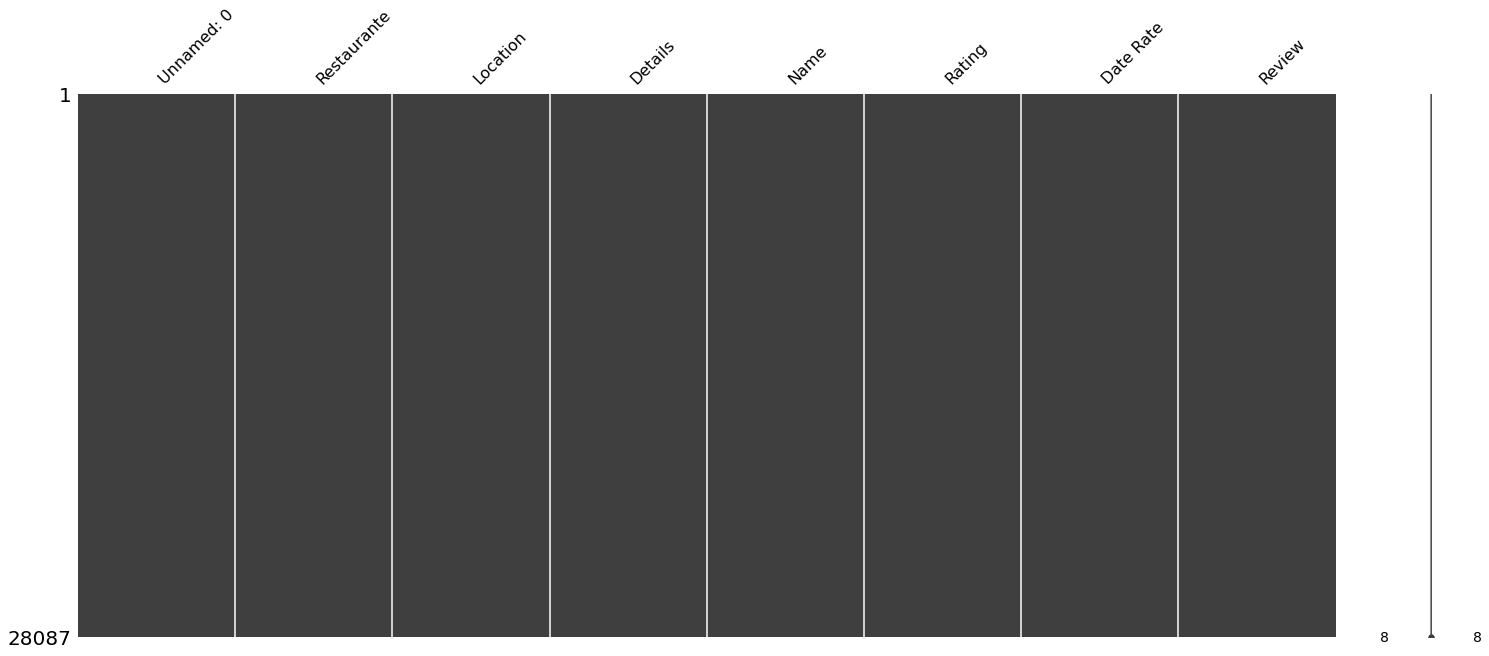

In [ ]:
mnso.matrix(dfsna)

In [ ]:
dfsna.shape

(28087, 8)

Valores únicos del ranking de un restaurante

In [ ]:
print(df.Rating.unique())

['5' '4' '3' '2' '1']


#Data processing

## preprocessing

In [ ]:
sample_review = dfsna["Review"].iloc[915]
print(sample_review)

La comida esta muy rica ademas de que el lugar es muy elegante y confortable. El personal es muy amable y te reciben con pequenias entradas de cortesia asi como un pequenio postre. Con gusto regreso otro dia :).


In [ ]:
decoded_review = html.unescape(sample_review)
print(decoded_review)

La comida esta muy rica ademas de que el lugar es muy elegante y confortable. El personal es muy amable y te reciben con pequenias entradas de cortesia asi como un pequenio postre. Con gusto regreso otro dia :).


In [ ]:
pattern = r"\.&\#-[0-9]+\!;"

dfsna["preprocessed"] = dfsna["Review"].str.replace(pat=pattern, repl="", regex=True)

print(dfsna["preprocessed"].iloc[915])

La comida esta muy rica ademas de que el lugar es muy elegante y confortable. El personal es muy amable y te reciben con pequenias entradas de cortesia asi como un pequenio postre. Con gusto regreso otro dia :).


###Extraction of the root word





In [ ]:

import re
import nltk

from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk.corpus import wordnet

#import nltk resources
resources = ["wordnet", "stopwords", "punkt", \
             "averaged_perceptron_tagger", "maxent_treebank_pos_tagger"]

for resource in resources:
    try:
        nltk.data.find("tokenizers/" + resource)
    except LookupError:
        nltk.download(resource)

#create Lemmatizer object
lemma = WordNetLemmatizer()

def lemmatize_word(tagged_token):
    """ Returns lemmatized word given its tag"""
    root = []
    for token in tagged_token:
        tag = token[1][0]
        word = token[0]
        if tag.startswith('J'):
            root.append(lemma.lemmatize(word, wordnet.ADJ))
        elif tag.startswith('V'):
            root.append(lemma.lemmatize(word, wordnet.VERB))
        elif tag.startswith('N'):
            root.append(lemma.lemmatize(word, wordnet.NOUN))
        elif tag.startswith('R'):
            root.append(lemma.lemmatize(word, wordnet.ADV))
        else:          
            root.append(word)
    return root

def lemmatize_doc(document):
    """ Tags words then returns sentence with lemmatized words"""
    lemmatized_list = []
    tokenized_sent = sent_tokenize(document)
    for sentence in tokenized_sent:
        no_punctuation = re.sub(r"[`'\",.!?()]", " ", sentence)
        tokenized_word = word_tokenize(no_punctuation)
        tagged_token = pos_tag(tokenized_word)
        lemmatized = lemmatize_word(tagged_token)
        lemmatized_list.extend(lemmatized)
    return " ".join(lemmatized_list)


dfsna["preprocessed"] = dfsna["preprocessed"].apply(lambda row: lemmatize_doc(row))

print(dfsna["preprocessed"].iloc[0])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!
El menu del Bajel es una garantía para los paladares más sofisticados e super creativo y cada platillo e un equilibrio perfecto de sabores novedosas Ya he ido tres veces y ya tengo planeada la próxima cena allí además el personal e súper atento y el chef toma el tiempo de pasar a saludarnos cada vez


##Cleaning data

In [ ]:
from unicodedata import normalize

remove_accent = lambda text: normalize("NFKD", text).encode("ascii", "ignore").decode("utf-8", "ignore")

dfsna["preprocessed"] = dfsna["preprocessed"].apply(remove_accent)

print(dfsna["preprocessed"].iloc[0])

El menu del Bajel es una garantia para los paladares mas sofisticados e super creativo y cada platillo e un equilibrio perfecto de sabores novedosas Ya he ido tres veces y ya tengo planeada la proxima cena alli ademas el personal e super atento y el chef toma el tiempo de pasar a saludarnos cada vez


###Removing punctuation

In [ ]:
pattern = r"[^\w\s]"

dfsna["preprocessed"] = dfsna["preprocessed"].str.replace(pat=pattern, repl=" ", regex=True)

print(dfsna["preprocessed"].iloc[0])

El menu del Bajel es una garantia para los paladares mas sofisticados e super creativo y cada platillo e un equilibrio perfecto de sabores novedosas Ya he ido tres veces y ya tengo planeada la proxima cena alli ademas el personal e super atento y el chef toma el tiempo de pasar a saludarnos cada vez


In [ ]:

pattern1 = r'\([^)]*\)'

dfsna["preprocessed"] = dfsna["preprocessed"].str.replace(pat=pattern1, repl=" ", regex=True)

print(dfsna["preprocessed"].iloc[915])



La comida esta muy rica ademas de que el lugar es muy elegante y confortable El personal e muy amable y te reciben con pequenias entradas de cortesia asi como un pequenio postre Con gusto regreso otro dia  


### Removing capital letters

In [ ]:
dfsna["preprocessed"] = dfsna["preprocessed"].str.lower()

print(dfsna["preprocessed"].iloc[915])

la comida esta muy rica ademas de que el lugar es muy elegante y confortable el personal e muy amable y te reciben con pequenias entradas de cortesia asi como un pequenio postre con gusto regreso otro dia  


### Removing Stop Words

In [ ]:
from nltk.corpus import stopwords

stop_words = stopwords.words("spanish")

stop_words = [word.replace("\'", "") for word in stop_words]

print(f"sample stop words: {stop_words[:15]} \n")

remove_stop_words = lambda row: " ".join([token for token in row.split(" ") \
                                          if token not in stop_words])
dfsna["preprocessed"] = dfsna["preprocessed"].apply(remove_stop_words)

print(dfsna["preprocessed"].iloc[0])

sample stop words: ['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con'] 

menu bajel garantia paladares mas sofisticados super creativo cada platillo equilibrio perfecto sabores novedosas ido tres veces planeada proxima cena alli ademas personal super atento chef toma tiempo pasar saludarnos cada vez


### Removing extra-spaces

In [ ]:
pattern = r"[\s]+"

dfsna["preprocessed"] = dfsna["preprocessed"].str.replace(pat=pattern, repl=" ", regex=True)

print(dfsna["preprocessed"].iloc[0])

menu bajel garantia paladares mas sofisticados super creativo cada platillo equilibrio perfecto sabores novedosas ido tres veces planeada proxima cena alli ademas personal super atento chef toma tiempo pasar saludarnos cada vez


###Removing emojis

In [ ]:
import emoji
def give_emoji_free_text(text): 
    allchars = [str for str in text] 
    emoji_list = [c for c in allchars if c in emoji.UNICODE_EMOJI] 
    clean_text = ' '.join([str for str in text.split() if not any(i in str for i in emoji_list)]) 
    return clean_text

for i in range(len(dfsna)):    
  dfsna["preprocessed"].iloc[i] = give_emoji_free_text(dfsna["preprocessed"].iloc[i])

## Tokenizacion

In [ ]:
corpora = dfsna["preprocessed"].values
tokenized = [corpus.split(" ") for corpus in corpora]

print(tokenized[0])

['menu', 'bajel', 'garantia', 'paladares', 'mas', 'sofisticados', 'super', 'creativo', 'cada', 'platillo', 'equilibrio', 'perfecto', 'sabores', 'novedosas', 'ido', 'tres', 'veces', 'planeada', 'proxima', 'cena', 'alli', 'ademas', 'personal', 'super', 'atento', 'chef', 'toma', 'tiempo', 'pasar', 'saludarnos', 'cada', 'vez']


## Phrase Modeling

Since word order is important in most NLP models, it is often helpful to group neighboring words that seem to convey meaning as if they were a single word.

To be considered a phrase, the number of times that two words must appear next to each other is set to at least 25. The threshold takes that minimum and compares it to the total number of token instances in the corpus. The higher the threshold, the more often two adjacent words must appear to be grouped into a sentence

In [ ]:
from gensim.models import Phrases
from gensim.models.phrases import Phraser

bi_gram = Phrases(tokenized, min_count=25, threshold=50)

tri_gram = Phrases(bi_gram[tokenized], min_count=25, threshold=50)

### Unigram

In [ ]:
uni_gram_tokens = set([token for text in tokenized for token in text])
uni_gram_tokens = set(filter(lambda x: x != "", uni_gram_tokens))

print(list(uni_gram_tokens)[:20])

['pequeno', 'constituye', 'extranjeros', 'mexi', 'merecer', 'acordes', 'regados', 'borracho', 'tuna', 'hiso', 'agradeble', 'cierra', 'complican', 'kimono', 'triplican', 'cuadro', 'luar', '1000', 'pude', 'obscura']


###Bigram

In [ ]:

bigram_min = bi_gram.min_count

bi_condition = lambda x: x[1] >= bigram_min

bi_gram_tokens = dict(filter(bi_condition, bi_gram.vocab.items()))
bi_gram_tokens = set([token.decode("utf-8") \
                      for token in bi_gram_tokens])

bi_grams_only = bi_gram_tokens.difference(uni_gram_tokens)
print(list(bi_grams_only)[:50])

['atienden_rapido', 'atentos_comida', 'gusto_servicio', 'calidad_sabor', 'pasar_tarde', 'sana_distancia', 'buen_precio', 'lugar_comer', 'delicioso_atencion', 'mejores_opciones', 'comida_buen', 'alimentos_deliciosos', 'valet_park', 'lugar_excelente', 'agradable_buen', 'comida_sabor', 'tragos_bien', 'mas_atencion', 'pesima_comida', 'hacer_reservacion', 'muchas_opciones', 'come_rico', 'agradable_comer', 'relacion_precio', 'ambiente_comida', 'doy_5', 'precios_mas', 'nueva_normalidad', 'precio_calidad', 'lugar_increible', 'bien_ubicado', 'precios_estan', 'mala_comida', 'servicio_impecable', 'cocina_mexicana', '100_recomendable', 'precio_razonable', 'comida_rica', 'enchiladas_suizas', 'excelente_decoracion', 'si_pides', 'precio_justo', 'sabor_comida', 'super_agradable', 'atencion_amable', 'cuenta_estacionamiento', 'si_buscas', 'agradable_ambiente', 'sopa_tortilla', 'precios_acorde']


### Trigram

In [ ]:
trigram_min = tri_gram.min_count

tri_condition = lambda x: x[1] >= trigram_min

tri_gram_tokens = dict(filter(tri_condition, tri_gram.vocab.items()))
tri_gram_tokens = set([token.decode("utf-8") \
                       for token in tri_gram_tokens])

tri_grams_only = tri_gram_tokens.difference(bi_gram_tokens)
print(list(tri_grams_only)[:50])

['pasar_rato_agradable', 'mejores_chiles_nogada', 'lugar_pasar_rato', 'doy_5_estrellas', 'caro_vale_pena']


In [ ]:
tokenized = [list(filter(lambda x: len(x) > 1, document)) \
             for document in tokenized]

print(tokenized[0])

['menu', 'bajel', 'garantia', 'paladares', 'mas', 'sofisticados', 'super', 'creativo', 'cada', 'platillo', 'equilibrio', 'perfecto', 'sabores', 'novedosas', 'ido', 'tres', 'veces', 'planeada', 'proxima', 'cena', 'alli', 'ademas', 'personal', 'super', 'atento', 'chef', 'toma', 'tiempo', 'pasar', 'saludarnos', 'cada', 'vez']


# Vocabulary

In [ ]:
from gensim.corpora.dictionary import Dictionary

vocabulary = Dictionary(tokenized)

vocabulary_keys = list(vocabulary.token2id)[0:10]

for key in vocabulary_keys:
    print(f"ID: {vocabulary.token2id[key]}, Token: {key}")

ID: 0, Token: ademas
ID: 1, Token: alli
ID: 2, Token: atento
ID: 3, Token: bajel
ID: 4, Token: cada
ID: 5, Token: cena
ID: 6, Token: chef
ID: 7, Token: creativo
ID: 8, Token: equilibrio
ID: 9, Token: garantia


#Bag of words

In [ ]:
bow = [vocabulary.doc2bow(doc) for doc in tokenized]

for idx, freq in bow[0]:
    print(f"Word: {vocabulary.get(idx)}, Frequency: {freq}")

Word: ademas, Frequency: 1
Word: alli, Frequency: 1
Word: atento, Frequency: 1
Word: bajel, Frequency: 1
Word: cada, Frequency: 2
Word: cena, Frequency: 1
Word: chef, Frequency: 1
Word: creativo, Frequency: 1
Word: equilibrio, Frequency: 1
Word: garantia, Frequency: 1
Word: ido, Frequency: 1
Word: mas, Frequency: 1
Word: menu, Frequency: 1
Word: novedosas, Frequency: 1
Word: paladares, Frequency: 1
Word: pasar, Frequency: 1
Word: perfecto, Frequency: 1
Word: personal, Frequency: 1
Word: planeada, Frequency: 1
Word: platillo, Frequency: 1
Word: proxima, Frequency: 1
Word: sabores, Frequency: 1
Word: saludarnos, Frequency: 1
Word: sofisticados, Frequency: 1
Word: super, Frequency: 2
Word: tiempo, Frequency: 1
Word: toma, Frequency: 1
Word: tres, Frequency: 1
Word: veces, Frequency: 1
Word: vez, Frequency: 1


### TF-IDF MODEL

It is a numerical measure that expresses how relevant a word is to a document in a collection.
  The tf-idf value increases proportionally to the number of times a word appears in the document, but is offset by the frequency of the word in the document collection, which allows handling of the fact that some words are generally more common than others .

In [ ]:
from gensim.models.tfidfmodel import TfidfModel

tfidf = TfidfModel(bow)

for idx, weight in tfidf[bow[0]]:
    print(f"Word: {vocabulary.get(idx)}, Weight: {weight:.3f}")

Word: ademas, Weight: 0.115
Word: alli, Weight: 0.202
Word: atento, Weight: 0.124
Word: bajel, Weight: 0.253
Word: cada, Weight: 0.250
Word: cena, Weight: 0.139
Word: chef, Weight: 0.141
Word: creativo, Weight: 0.234
Word: equilibrio, Weight: 0.230
Word: garantia, Weight: 0.174
Word: ido, Weight: 0.157
Word: mas, Weight: 0.081
Word: menu, Weight: 0.095
Word: novedosas, Weight: 0.245
Word: paladares, Weight: 0.200
Word: pasar, Weight: 0.116
Word: perfecto, Weight: 0.142
Word: personal, Weight: 0.092
Word: planeada, Weight: 0.239
Word: platillo, Weight: 0.129
Word: proxima, Weight: 0.253
Word: sabores, Weight: 0.137
Word: saludarnos, Weight: 0.284
Word: sofisticados, Weight: 0.245
Word: super, Weight: 0.180
Word: tiempo, Weight: 0.120
Word: toma, Weight: 0.205
Word: tres, Weight: 0.161
Word: veces, Weight: 0.129
Word: vez, Weight: 0.124


###Word Embedding Word2Vec

The objective of Word2vec "word to vector" is as the name says, to convert a word to a vector, given the vocabulary with the words of the previously generated corpus, it trains a neural network with the sentences of the corpus so that, for a word Given, tell us the probability that each vocabulary word is a neighbor of the first.

In [ ]:
import numpy as np

from gensim.models import word2vec

np.set_printoptions(suppress=True)

feature_size = 100
context_size = 20
min_word = 1

word_vec= word2vec.Word2Vec(tokenized, size=feature_size, \
                            window=context_size, min_count=min_word, \
                            iter=50, seed=42)

#Final dataframe

The goal is to have a dataframe with observations corresponding to the restaurant reviews. The word_vec model is used to gather all the unique tokens in the corpus. This allows us to generate word_vec_df that makes use of the dimensions as characteristics of each word

In [ ]:
word_vec_unpack = [(word, idx.index) for word, idx in \
                   word_vec.wv.vocab.items()]

tokens, indexes = zip(*word_vec_unpack)

word_vec_df = pd.DataFrame(word_vec.wv.syn0[indexes, :], index=tokens)

display(word_vec_df.head())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
menu,1.272493,-1.395208,0.975466,-1.246054,-0.661563,1.456521,1.477144,-1.213323,-2.921607,0.005190,1.896307,1.439380,4.837826,-2.078743,-2.985041,0.217914,0.185997,-1.589599,1.088418,1.865274,1.182873,2.082647,-2.002354,-3.450042,-4.234566,3.250424,-2.538909,2.261618,-4.007044,1.448755,-2.787818,-0.294996,-4.636264,0.945747,2.489092,5.897279,-2.392661,-4.500229,-5.502433,1.155347,...,-0.824491,3.381535,2.236069,2.121449,2.895770,-4.185844,-2.546147,1.160528,-2.401521,2.375223,-3.313292,-2.921531,3.925318,3.499453,0.637554,0.596510,-1.628907,0.511798,-3.421158,-3.695408,-1.483395,-0.163521,-4.428867,-1.773635,1.091657,-1.090457,1.847316,-1.229941,0.306308,-4.221271,0.157898,-4.069758,-0.322527,-5.146165,-0.896215,-0.252261,-4.856326,-2.057588,0.705301,0.777982
bajel,-0.039718,0.268500,-0.621328,0.257479,0.123875,-0.147959,0.201137,0.586193,-0.249773,-0.021044,-0.355834,0.494119,-0.013399,-0.078832,-0.257333,-0.569687,-0.407263,0.099482,-0.593468,-0.683557,0.256507,-0.103831,-0.004727,0.295790,0.242622,0.053914,0.224153,0.033540,-0.073984,-0.424981,-0.086142,-0.070120,0.287377,-0.213863,0.271474,0.101990,0.067011,-0.393652,-0.679842,0.399270,...,-0.094332,0.290129,-0.018342,0.463078,-0.232055,-0.168506,-0.429026,0.304280,-0.220234,-0.049586,0.015357,-0.170618,0.005512,0.102311,-0.368564,-0.223753,0.389821,-0.358502,-0.653139,-0.319204,-1.104080,-0.167158,0.405818,0.427976,-0.537008,-0.543599,-0.057307,0.207264,0.843487,0.083525,-0.462391,0.308108,0.325868,-0.459840,0.103187,0.109390,-0.287230,-0.327289,0.048269,0.328718
garantia,-0.967176,-1.737465,-1.575681,-0.079370,0.994358,0.731414,-1.346239,-0.032311,0.207195,0.186341,-1.147441,1.645273,-0.417555,0.761424,0.002221,-2.051893,-2.775592,-0.628511,-1.482404,-0.575709,-2.057367,-0.012319,0.831586,-0.126248,-0.177262,2.085728,0.057320,1.355212,-1.083628,-1.782262,0.807905,-0.214380,0.069707,1.542392,-1.132512,0.676804,1.032920,0.685713,-2.757451,0.240346,...,0.812023,0.923391,0.638519,0.220726,1.092952,-1.797876,-0.605833,-0.073186,1.617430,0.301242,0.402498,-1.853191,-0.228540,1.401229,2.287545,0.607377,-1.460942,-0.498178,-1.900753,-0.114941,-0.727164,0.893195,-0.631974,0.086187,3.086168,1.894819,-1.377826,0.873401,1.632619,0.105886,0.954664,1.560281,-0.302561,-0.351887,1.870520,1.475391,-0.528180,-0.988994,1.141344,0.329971
paladares,0.543832,-0.313809,-0.534080,2.291147,-0.889786,-0.953272,0.350277,-0.082148,1.102966,-1.540674,-2.403234,1.603921,1.468465,0.390523,1.088159,0.246140,0.144426,-0.035900,-0.836169,-3.040804,-0.804028,0.468723,0.354050,1.133463,-1.135855,-1.195977,0.125997,0.079844,-1.894349,-1.286160,0.055581,-2.805261,0.279366,0.918134,0.673787,1.440556,-0.369907,-1.760182,0.173374,-1.323810,...,1.508018,1.291660,-1.197320,1.882139,0.796964,-0.570604,-0.085159,0.178114,-2.461176,-0.053436,-0.044501,-0.324329,-0.787745,-0.174616,0.188227,-1.655843,-0.648183,-1.010996,-1.312443,-2.339561,0.667492,1.201334,-0.898890,0.326563,-1.003559,-1.951257,-1.178626,0.358480,0.323549,0.276353,-2.011671,-1.048644,0.328963,-0.762012,0.822665,0.597235,-0.096276,-1.093125,-0.457675,0.927253
mas,1.353444,-1.812354,2.426138,3.167421,1.822898,-3.911949,-0.689480,-0.638506,-2.401223,2.120727,-1.509779,2.851526,0.155953,-0.687380,-1.549580,-0.292160,0.585821,2.176800,0.010767,2.854688,3.769511,-0.155053,2.594542,-0.310214,-0.433136,-1.118272,-1.038284,0.333115,0.086633,5.336687,0.471894,2.383478,2.071686,-1.798083,1.680920,2.727593,-0.396484,-0.210821,1.025216,1.448184,...,-2.564287,-0.200122,-1.455253,3.509972,-1.726409,-0.845471,0.094898,-2.919189,-0.549341,0.265420,1.518673,1.364789,-0.427715,-4.170741,2.584188,0.297647,-2.300415,1.103860,0.029469,-0.954262,1.449966,-0.176849,-1.641563,1.440981,-1.297730,-3.770464,-3.414960,1.339358,1.185722,-5.089926,

In [ ]:
tokenized_array = np.array(tokenized)

model_array = np.array([word_vec_df.loc[doc].mean(axis=0) for doc in tokenized_array])

In [ ]:
model_df = pd.DataFrame(model_array)
model_df["label"] = dfsna["Rating"]

display(model_df.head())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,label
0,0.029139,-0.006499,-1.316017,0.772509,0.458312,-0.660213,1.417590,-0.147795,-0.223379,-0.273524,0.021406,1.022280,0.103950,1.114779,-0.515224,-0.883969,-0.031053,0.122315,-0.610986,-0.488120,-0.061443,0.767768,-0.365979,-0.155200,-0.139321,0.454579,0.039777,0.232327,-0.773742,0.222654,0.208461,-0.349960,0.157881,0.808219,1.177211,0.955126,-0.212329,-0.705008,0.009480,0.170649,...,1.216852,-0.848993,0.479055,-0.695026,0.144787,-0.787007,0.377390,-0.513883,0.187234,0.533788,-0.524996,0.346292,-0.453456,0.629625,-0.357311,-0.646254,-0.529871,-0.091040,-0.558409,-0.172424,-0.798160,-1.145629,0.563201,-0.868782,-0.804137,-0.274396,0.586815,0.458485,-0.338878,-0.858260,-1.659672,-0.050906,-0.594761,0.683900,-0.164320,0.190590,-0.375998,0.298910,0.529690,5
1,-0.030961,-0.473809,0.156992,0.847860,0.469408,0.271832,1.102046,0.125987,0.748544,-0.890330,0.177248,-0.116918,-0.380347,-0.311270,1.151771,0.353962,-0.601813,-0.012460,-0.274929,-0.581682,-0.045454,-0.447825,-0.281326,0.415856,-0.095120,-0.030874,0.528304,-0.115961,-0.010502,0.473833,0.642276,-0.163562,-0.405941,0.172169,0.339227,0.956908,0.786483,-0.122160,-1.257564,0.062722,...,0.373649,-1.028259,0.296474,0.212173,0.129410,-0.525628,-0.358735,-0.464735,0.296773,-0.583730,0.688906,-0.429652,0.048766,0.595101,0.522119,0.506897,0.162772,-0.093066,-1.001828,-1.300688,0.327254,-0.239774,0.034822,-0.912124,-0.343031,-0.053575,0.117689,0.357838,-0.178437,-0.225464,-0.177701,0.261660,0.545070,-0.158724,0.077989,0.044705,0.299680,0.295055,-0.003801,5
2,0.270440,-0.533014,-0.007468,0.498248,0.018211,-0.046455,0.998174,0.704723,0.855608,-0.046291,-0.716781,0.238941,-0.142580,-0.118121,0.402408,-0.776882,-0.221024,0.427823,-0.499037,-1.834925,-0.215342,-0.299718,-0.973157,0.080404,0.557546,-0.778080,-0.790871,-0.324983,0.013112,-0.066149,0.563995,0.221954,0.363904,-0.647119,0.364328,0.598070,-0.055558,-0.829652,-0.909846,-0.532286,...,1.621197,-1.237158,0.830215,0.940133,0.437747,-1.028930,0.033426,-0.049361,0.842373,0.664971,0.879167,-0.440555,0.365883,0.158828,-0.551591,0.369962,-0.016748,0.289367,-0.853248,-1.496441,-0.789565,-0.645147,0.127716,-0.613250,-0.822985,-0.806005,0.411940,-0.005458,-0.011041,0.158793,-0.250748,0.457595,0.637336,-0.207572,0.502170,0.241991,0.065512,-0.606748,1.285800,5
3,-0.248892,-0.736260,-3.471809,0.236198,-1.260105,-0.636693,1.508158,2.420615,0.461151,-0.213598,-4.241802,1.768389,-2.107322,-0.748107,-0.547731,-2.878350,-1.573236,-0.274810,0.066681,1.650874,-1.808689,0.052652,1.032582,0.201443,1.781335,0.132044,1.319910,-0.917448,-2.533522,-0.825130,-0.408832,2.451277,-0.223388,0.352710,-2.876310,1.266413,0.406632,-3.579857,-0.638267,-1.334745,...,0.259555,-0.508471,0.454463,1.004782,1.099607,1.454770,0.543204,0.455898,2.574347,-3.434188,2.350048,2.310039,4.119145,2.451809,2.641691,-0.159341,-1.070989,-0.001272,-1.127843,1.467852,-0.601216,0.124471,-1.771626,0.820553,-2.056613,-0.013544,0.472568,2.260810,-0.858046,1.410564,2.450108,-1.548826,-1.108640,3.168066,0.975021,0.433046,-0.870644,1.230285,1.615086,5
4,-0.363750,-0.421978,0.076591,0.582877,-0.864587,0.177321,0.871041,-0.510556,1.029680,-0.212726,-1.209828,0.094011,0.200013,-0.635500,0.257778,0.322171,0.181987,0.365259,-0.439167,-1.200894,0.607041,0.290048,-0.717279,-0.107790,0.769014,-1.286033,-1.606950,-0.296717,-0.007571,0.218246,0.434661,0.450394,-1.069068,0.041640,-0.399053,1.236154,0.716228,-0.111283,0.003720,-0.918510,...,0.291935,-0.946258,0.053702,0.982059,1.127192,-0.041718,0.796255,-0.166139,1.071696,-0.597758,0.367255,-0.465995,1.198566,0.220768,-1.039902,0.406854,0.285430,-0.356745,-0.680490,-1.602603,0.419427,-1.269682,-0.371408,0.098402,-0.925234,-0.969964,-0.211884,1.365282,-0.076116,-0.040778,-1.010082,0.185234,0.324943,0.357403,0.752663,-0.527802

In [ ]:
model_df.shape

(28087, 101)

#PCA Principal Component Analysis

Principal Component Analysis (PCA) is a dimensionality reduction technique that we can use in our model_df to reduce its 100 dimensions to just two dimensions. This will help to visualize whether there is a clear decision boundary across the five overall rating classifications. The more data points belonging to the same class that are grouped together, the greater the probability that our machine learning model will be simpler and more efficient.

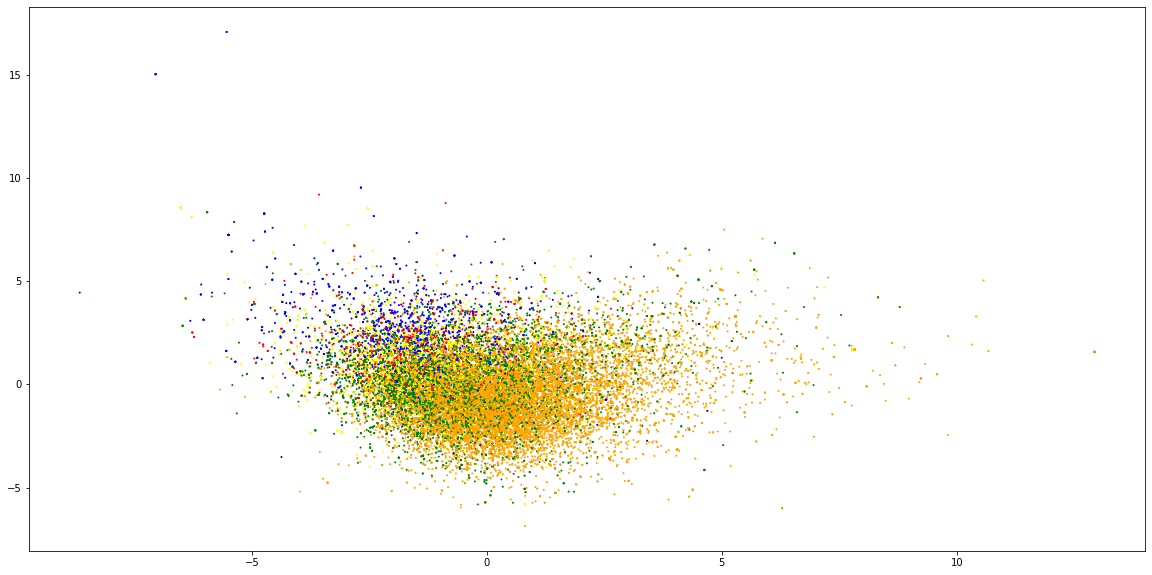

In [ ]:
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

#sampling the model_df population
pca_df = model_df.reset_index()
pca_df = model_df.dropna(axis=0).iloc[:,1:]
pca_df = pca_df

#setting up PCA
pca = PCA(n_components=2, random_state=42)
pca = pca.fit_transform(pca_df.iloc[:, :-1])
labels = pca_df["label"]

#setting up plot components
x_axis = pca[:,0]
y_axis = pca[:,1]
color_map = pca_df["label"].map({"1":"blue", \
                                 "2":"red", \
                                 "3":"yellow", \
                                 "4":"green", \
                                 "5":"orange"})

#plotting PCA
f, axes = plt.subplots(figsize=(20,10))
plt.scatter(x_axis, y_axis, color=color_map, s=1)
plt.show()

# exploratory data analysis

##Word2Vec

In order to appreciate the concept of embbeded words, we took five common words in our corpus and derived their five most related words using our word_vec model. The similarity comes from the frequency with which these tokens appear in the same word window as their word_bank counterpart.

In [ ]:
word_bank = ["excelente", "bueno", "barato", "comida", "mal"]

for word in word_bank[:]:
    related_vec = word_vec.wv.most_similar(word, topn=4)
    related_words = np.array(related_vec)[:,0]
    word_bank.extend(related_words)
    print(f"{word}: {related_words}")

excelente: ['inmejorable' 'inigualable' 'buen' 'execelente']
bueno: ['buen' 'bien' 'limitan' 'infame']
barato: ['berenjenas' 'pena' 'economico' 'asegurense']
comida: ['cocina' 'alargan' 'vieja' 'santiago']
mal: ['pesimo' 'horrible' 'peor' 'asco']


##T-SNE

T-Distributed Stochastic Neighbor Embedding t-SNE This is another dimensionality reduction technique that helps visualize high-dimensional data sets. To perceive the similarity between related words in terms of spatial distance, t-SNE provided the coordinates of each word in a two-dimensional scatter plot plane.

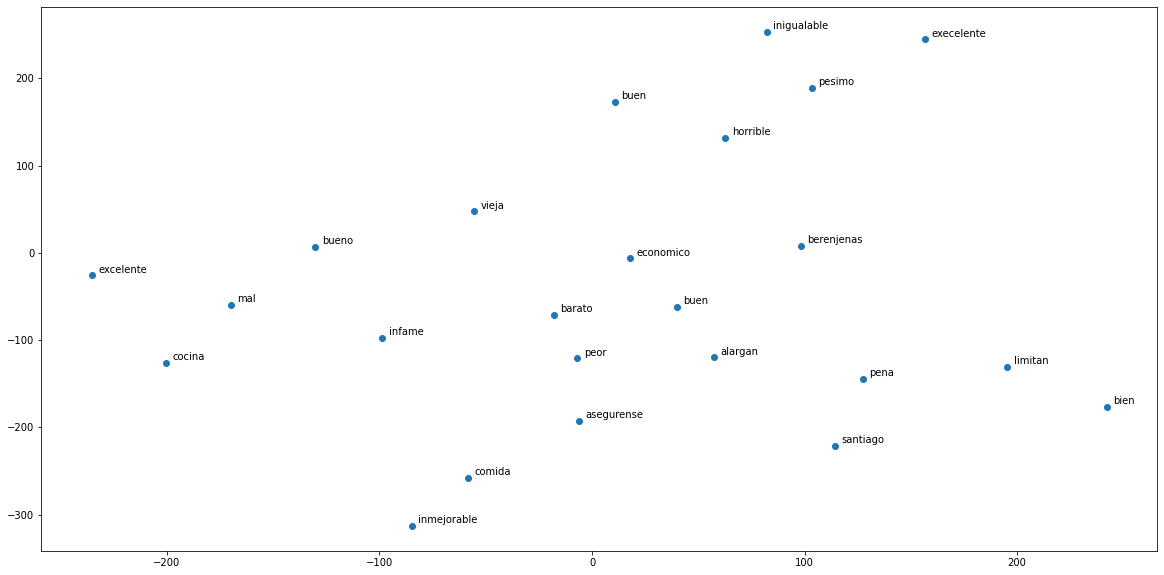

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=5, n_iter=1000, random_state=42)

sample_vecs = word_vec.wv[set(word_bank)]
sample_tsne = tsne.fit_transform(sample_vecs)
tsne_x = sample_tsne[:, 0]
tsne_y = sample_tsne[:, 1]

f, axes = plt.subplots(figsize=(20,10))
ax = plt.scatter(x=tsne_x, y=tsne_y)

for label, x, y in zip(word_bank, tsne_x, tsne_y):
    plt.annotate(label, xy=(x+3, y+3))

plt.show()

##Word Algebra

Since Word2Vec characterizes words in quantized tokens, we can add or subtract vectors of words together. Adding is combining the meaning of the components and subtracting is taking the context of one token from another. The following are examples of this vector algebra and its similarity scores:

In [ ]:
word_vec.wv.most_similar(positive=["rico", "bueno"], \
                      negative=[], topn=1)

[('bien', 0.47047874331474304)]

In [ ]:
word_vec.wv.most_similar(positive=["buen"], \
                      negative=["feo"], topn=1)

[('excelente', 0.4676738679409027)]

##Named-Entity Recognition

In [ ]:
helpful = dfsna["preprocessed"].tolist()

most_helpful = max(helpful)

most_helpful_idx = dfsna["preprocessed"].astype(str) == str(most_helpful)
most_helpful_idx = dfsna[most_helpful_idx].index

most_helpful_text = dfsna["preprocessed"].iloc[most_helpful_idx].values[0]

print(most_helpful_text)

zuppa toscana delicia ravioles medios crudos cantidades abundantes buen sabor mucha gente temporada recomendable reservar


In [ ]:
import spacy

from collections import defaultdict

ner = spacy.load("en")

ner_helpful = ner(most_helpful_text)

ner_dict = defaultdict(list)
for entity in ner_helpful.ents:
    ner_dict[entity.label_].append(entity)

for NER, name in ner_dict.items():
    print(f"{NER}:\n{name}\n")

PERSON:
[zuppa toscana delicia, mucha gente temporada]



In [ ]:
from spacy import displacy

displacy.render(ner_helpful, style="ent", jupyter=True)

##Dependency tree

La capacidad de NER de spaCy se basa en descifrar la estructura de la oración al desglosar cómo interactúan los tokens e influyen entre sí. A continuación se muestran los árboles de dependencia de las tres primeras oraciones del most_helpful_text.

In [ ]:
def ner_displacy(sentence):
    ner_sentence = ner(sentence)
    displacy.render(ner_sentence, jupyter=True, \
                    options={"compact": False, \
                             "distance": 90, \
                             "word_spacing":20, \
                             "arrow_spacing":10, \
                             "arrow_stroke": 2, \
                             "arrow_width": 5})

for sentence in most_helpful_text.split(".")[0:3]:
    ner_displacy(sentence)

## Topic Modeling

Topic modeling is a machine learning technique that is capable of scanning a set of documents, detecting patterns of words and phrases within them, and automatically clusters by groups of words and similar expressions that best characterize a set of documents.

In [ ]:
import multiprocessing

from gensim.models.ldamulticore import LdaMulticore

cores = multiprocessing.cpu_count()

num_topics = 10
bow_lda = LdaMulticore(bow, num_topics=num_topics, id2word=vocabulary, \
                       passes=5, workers=cores, random_state=42)

for token, frequency in bow_lda.show_topic(0, topn=5):
    print(token, frequency)

si 0.025480213
mas 0.015299431
cerveza 0.013725724
rico 0.008634764
taco 0.007869808


In [ ]:
for topic in range(0, num_topics):
    print(f"\nTopic {topic+1}:")
    for token, frequency in bow_lda.show_topic(topic, topn=5):
        print(f" {token}, {frequency}")


Topic 1:
 si, 0.02548021264374256
 mas, 0.015299431048333645
 cerveza, 0.013725724071264267
 rico, 0.008634763769805431
 taco, 0.007869808003306389

Topic 2:
 lugar, 0.020289886742830276
 mejor, 0.017977774143218994
 atencion, 0.014018534682691097
 exelente, 0.010799329727888107
 restaurante, 0.010695677250623703

Topic 3:
 rico, 0.05046025291085243
 medidas, 0.030702954158186913
 servicio, 0.02165280282497406
 original, 0.016578493639826775
 buenas, 0.014964052475988865

Topic 4:
 buen, 0.11980103701353073
 servicio, 0.07405184954404831
 lugar, 0.0644630491733551
 excelente, 0.04335305467247963
 comida, 0.029208123683929443

Topic 5:
 lugar, 0.03661445528268814
 comida, 0.03305479884147644
 caro, 0.02153993397951126
 bonito, 0.012978509068489075
 agradable, 0.012937054969370365

Topic 6:
 delicioso, 0.029590902850031853
 mal, 0.01272326149046421
 lugar, 0.011602507904171944
 mas, 0.009833821095526218
 pasta, 0.008210686035454273

Topic 7:
 excelente, 0.058360081166028976
 lugar, 0.05

In [ ]:

import pyLDAvis.gensim

lda_idm = pyLDAvis.gensim.prepare(bow_lda, bow, vocabulary)

pyLDAvis.display(lda_idm)

# Machine Learning

## NaN Values

In [ ]:
nan_list = model_df[model_df[0].isna()].index
nan_list = nan_list.tolist()

print(nan_list[0:100])

[36, 4728, 6234, 6626, 12914, 12921, 14415, 15174, 17241, 19109, 20511, 21210, 21368, 22747, 24700, 25607, 27373, 27376, 27384, 27385]


In [ ]:
print(*[tokenized[blank] for blank in nan_list[0:5]])

[] [] [] [] []


Al imponer estos índices a nuestro df, podemos extraer cómo se veían originalmente estas revisiones antes de la tokenización y antes de que se realizaran todos los pasos previos al procesamiento.

In [ ]:
for blank in nan_list[0:5]:
    display(df["Review"].iloc[blank])

'\U0001f970'

'Cómo todos'

'Del 1'

'No fui'

'Lo'

In [ ]:

print(f"Original 'model_df' count: {len(model_df)}")
print(f"Final 'model_df' count: {len(model_df.dropna(axis=0))}")

model_df = model_df.dropna(axis=0)
display(model_df.head())

Original 'model_df' count: 28087
Final 'model_df' count: 28067


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,label
0,0.029139,-0.006499,-1.316017,0.772509,0.458312,-0.660213,1.417590,-0.147795,-0.223379,-0.273524,0.021406,1.022280,0.103950,1.114779,-0.515224,-0.883969,-0.031053,0.122315,-0.610986,-0.488120,-0.061443,0.767768,-0.365979,-0.155200,-0.139321,0.454579,0.039777,0.232327,-0.773742,0.222654,0.208461,-0.349960,0.157881,0.808219,1.177211,0.955126,-0.212329,-0.705008,0.009480,0.170649,...,1.216852,-0.848993,0.479055,-0.695026,0.144787,-0.787007,0.377390,-0.513883,0.187234,0.533788,-0.524996,0.346292,-0.453456,0.629625,-0.357311,-0.646254,-0.529871,-0.091040,-0.558409,-0.172424,-0.798160,-1.145629,0.563201,-0.868782,-0.804137,-0.274396,0.586815,0.458485,-0.338878,-0.858260,-1.659672,-0.050906,-0.594761,0.683900,-0.164320,0.190590,-0.375998,0.298910,0.529690,5
1,-0.030961,-0.473809,0.156992,0.847860,0.469408,0.271832,1.102046,0.125987,0.748544,-0.890330,0.177248,-0.116918,-0.380347,-0.311270,1.151771,0.353962,-0.601813,-0.012460,-0.274929,-0.581682,-0.045454,-0.447825,-0.281326,0.415856,-0.095120,-0.030874,0.528304,-0.115961,-0.010502,0.473833,0.642276,-0.163562,-0.405941,0.172169,0.339227,0.956908,0.786483,-0.122160,-1.257564,0.062722,...,0.373649,-1.028259,0.296474,0.212173,0.129410,-0.525628,-0.358735,-0.464735,0.296773,-0.583730,0.688906,-0.429652,0.048766,0.595101,0.522119,0.506897,0.162772,-0.093066,-1.001828,-1.300688,0.327254,-0.239774,0.034822,-0.912124,-0.343031,-0.053575,0.117689,0.357838,-0.178437,-0.225464,-0.177701,0.261660,0.545070,-0.158724,0.077989,0.044705,0.299680,0.295055,-0.003801,5
2,0.270440,-0.533014,-0.007468,0.498248,0.018211,-0.046455,0.998174,0.704723,0.855608,-0.046291,-0.716781,0.238941,-0.142580,-0.118121,0.402408,-0.776882,-0.221024,0.427823,-0.499037,-1.834925,-0.215342,-0.299718,-0.973157,0.080404,0.557546,-0.778080,-0.790871,-0.324983,0.013112,-0.066149,0.563995,0.221954,0.363904,-0.647119,0.364328,0.598070,-0.055558,-0.829652,-0.909846,-0.532286,...,1.621197,-1.237158,0.830215,0.940133,0.437747,-1.028930,0.033426,-0.049361,0.842373,0.664971,0.879167,-0.440555,0.365883,0.158828,-0.551591,0.369962,-0.016748,0.289367,-0.853248,-1.496441,-0.789565,-0.645147,0.127716,-0.613250,-0.822985,-0.806005,0.411940,-0.005458,-0.011041,0.158793,-0.250748,0.457595,0.637336,-0.207572,0.502170,0.241991,0.065512,-0.606748,1.285800,5
3,-0.248892,-0.736260,-3.471809,0.236198,-1.260105,-0.636693,1.508158,2.420615,0.461151,-0.213598,-4.241802,1.768389,-2.107322,-0.748107,-0.547731,-2.878350,-1.573236,-0.274810,0.066681,1.650874,-1.808689,0.052652,1.032582,0.201443,1.781335,0.132044,1.319910,-0.917448,-2.533522,-0.825130,-0.408832,2.451277,-0.223388,0.352710,-2.876310,1.266413,0.406632,-3.579857,-0.638267,-1.334745,...,0.259555,-0.508471,0.454463,1.004782,1.099607,1.454770,0.543204,0.455898,2.574347,-3.434188,2.350048,2.310039,4.119145,2.451809,2.641691,-0.159341,-1.070989,-0.001272,-1.127843,1.467852,-0.601216,0.124471,-1.771626,0.820553,-2.056613,-0.013544,0.472568,2.260810,-0.858046,1.410564,2.450108,-1.548826,-1.108640,3.168066,0.975021,0.433046,-0.870644,1.230285,1.615086,5
4,-0.363750,-0.421978,0.076591,0.582877,-0.864587,0.177321,0.871041,-0.510556,1.029680,-0.212726,-1.209828,0.094011,0.200013,-0.635500,0.257778,0.322171,0.181987,0.365259,-0.439167,-1.200894,0.607041,0.290048,-0.717279,-0.107790,0.769014,-1.286033,-1.606950,-0.296717,-0.007571,0.218246,0.434661,0.450394,-1.069068,0.041640,-0.399053,1.236154,0.716228,-0.111283,0.003720,-0.918510,...,0.291935,-0.946258,0.053702,0.982059,1.127192,-0.041718,0.796255,-0.166139,1.071696,-0.597758,0.367255,-0.465995,1.198566,0.220768,-1.039902,0.406854,0.285430,-0.356745,-0.680490,-1.602603,0.419427,-1.269682,-0.371408,0.098402,-0.925234,-0.969964,-0.211884,1.365282,-0.076116,-0.040778,-1.010082,0.185234,0.324943,0.357403,0.752663,-0.527802

## Unbalanced data

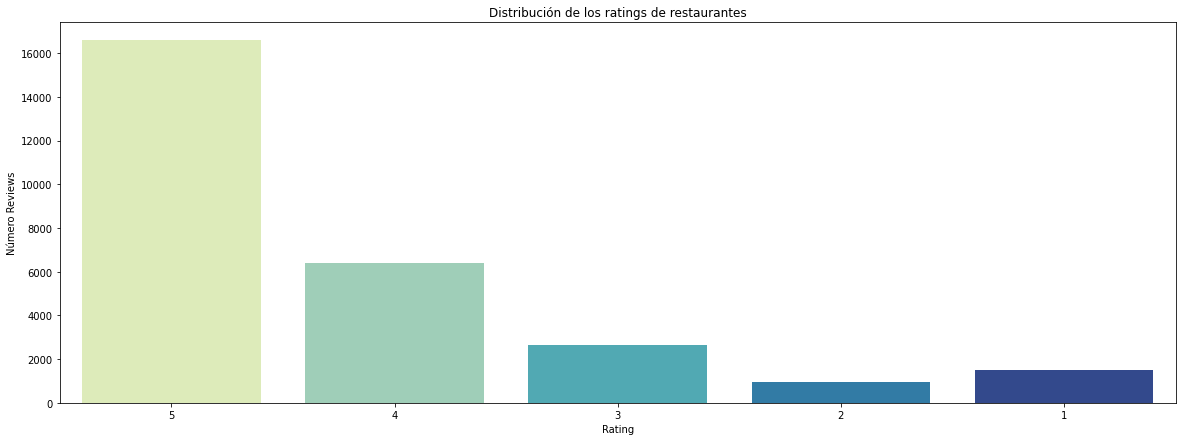

In [ ]:
import seaborn as sns

f, axes = plt.subplots(figsize=(20,7))
ax = sns.countplot(x=df["Rating"], palette="YlGnBu")
ax.set(title="Distribución de los ratings de restaurantes", \
       xlabel="Rating", ylabel="Número Reviews")
plt.show()

If the model rates each review with a rating of 5 then an accuracy of 59% can be achieved given this data set. We need to make sure to stratify the tests on which we base the final model score. For this, we will have to take into account the under-representation of the majority and the over-representation of the minority.

In [ ]:
majority = dfsna["Rating"] == "5"
majority_ratio = len(dfsna[majority]) / len(dfsna)

print(f"{majority_ratio*100:.2f}%")

59.04%


###Underrepresentation vs. Overrepresentation

In [ ]:
count = len(model_df[model_df["label"] == "2"])
print(f"Tamaño de la clase mas subrepresentada: {count}")

Tamaño de la clase mas subrepresentada: 954


In [ ]:
#trim trunca la clase mayoritaria (rating 5)
condition = model_df["label"] == "5"
trimmed_df = model_df[condition].sample(n=count, random_state=42)

#trim trunca los demas rating y se agrega a trimmed_df
for rating in ["1","2","3","4"]:
    condition = model_df["label"] == rating
    if len(model_df[condition]) >= count:
        add_df = model_df[condition].sample(n=count, random_state=42)
    else:
        add_df = model_df[condition]
    trimmed_df = pd.concat([trimmed_df, add_df], ignore_index=False)

#muestra nuevos tramaños de clases del tamaño de trimmed_df
for rating in ["1","2","3", "4", "5"]:
    class_size = len(trimmed_df[trimmed_df["label"] == rating])
    print(f"Size of Class {rating}: {class_size}")

Size of Class 1: 954
Size of Class 2: 954
Size of Class 3: 954
Size of Class 4: 954
Size of Class 5: 954


In [ ]:
trimmed_df = trimmed_df.sort_values(by="label")
display(trimmed_df.head())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,label
18603,-0.319103,0.001854,-0.307389,-0.373666,0.451645,-0.994748,-1.022659,-0.522642,0.736214,0.058556,0.820682,0.774476,-0.505149,1.573555,-0.606803,-0.117384,-0.637874,0.869616,0.083415,0.233841,0.466619,0.362729,-0.908803,0.204244,-0.511717,0.604598,-0.229716,-0.398663,0.236666,1.180204,-0.594677,-0.924244,-0.242874,0.447560,-0.454996,-0.088810,0.776001,0.553258,-0.037759,-0.122289,...,-0.660024,-0.682208,-0.665597,-0.386096,0.418850,-0.729953,-0.974664,-0.657524,-0.071778,0.757304,-0.262877,-1.931096,0.424150,-0.634083,0.251802,-0.552331,0.656053,-0.890382,0.182698,-0.757925,-0.156209,-1.105618,-0.758851,-1.462978,-0.400109,-0.133299,-0.021883,-0.041086,-0.065335,-0.536836,-0.472913,0.137744,1.136092,0.791898,-0.659433,0.147772,-0.341041,0.535049,0.045131,1
8231,-0.419084,-2.246322,-0.619253,0.485120,0.293380,0.423230,0.876437,-0.520350,-0.578812,-0.844533,0.451398,0.407434,-0.866490,-0.198091,0.472875,0.070171,0.274116,-0.068950,-0.958655,-0.213631,0.691490,0.007963,0.709733,-0.142931,-0.003959,0.734231,0.618197,0.064679,1.160003,0.354692,-1.549863,-1.419536,-0.689503,0.375695,0.346449,1.063983,-0.453680,0.233657,0.596894,0.843017,...,-0.247178,-0.666692,-0.219156,-0.407897,0.355396,-0.723412,-0.320134,0.396344,-0.669811,0.919566,0.458650,-0.064576,-0.502284,-0.439231,0.914521,-0.262867,0.388592,-0.380779,0.324152,0.301064,-0.548330,-0.688607,-0.561703,-0.126398,-0.760015,0.028847,0.941297,-0.348268,-1.257455,-0.038387,-0.054454,-0.680984,0.534054,0.265919,-0.537231,0.460352,0.712648,-0.691633,-0.846320,1
7883,1.161613,-0.889638,-0.706382,-1.470474,1.387311,-2.603717,0.267602,1.027573,-0.245448,-0.079272,1.073135,-0.767393,-0.069575,-2.438861,0.900022,1.037234,0.815998,1.642687,-0.456521,1.769170,-0.067470,1.124670,-0.439562,0.104228,2.647574,-0.161855,0.988959,1.522484,0.086675,0.599608,-0.775336,-0.258140,0.898992,-1.186649,-0.037051,0.797010,0.159834,0.579128,-0.643537,-0.115643,...,0.465277,-0.012032,-0.227198,1.894642,0.102390,0.468513,0.986384,0.574786,-0.476774,0.297875,0.049678,-0.600029,-0.893318,0.628696,-0.094147,-0.430078,-0.061829,-0.870121,0.801826,1.569340,-0.363026,-0.191114,0.357723,0.180991,-1.239026,1.179674,0.774235,-0.242031,-0.158341,0.873031,2.294489,0.378796,-1.381502,0.008155,-2.418945,-0.316331,1.803535,-0.204296,-0.016436,1
27136,-0.515708,-3.364788,1.132594,1.466130,0.820889,2.114294,0.817066,-2.772274,-0.054003,0.504398,2.688877,-0.401212,-0.464328,1.156621,2.275143,-2.099692,-1.158472,2.272684,1.681260,3.035324,-0.414279,-2.276648,-0.471720,0.488376,-0.998569,-1.553095,2.511662,-0.701285,2.199879,1.997992,-4.012125,-3.027353,-0.362295,0.733538,-0.079500,-0.449303,-0.158758,1.470087,3.332393,-0.469180,...,-2.256411,-0.513086,-0.022205,-3.383665,1.789867,0.106898,1.004768,2.038324,1.813399,-0.754829,0.656299,1.258789,0.654277,-0.144462,-1.608013,-1.308628,2.537573,-1.012350,1.681212,3.143908,-2.629634,-0.017152,-0.300553,1.442716,-0.843250,-0.189603,1.349658,-1.666471,-1.440393,0.445988,1.389336,-0.602828,0.015627,3.233656,-0.184324,1.048859,-2.845304,2.316523,-1.414827,1
2831,0.074709,-2.367154,-0.325635,0.307781,-0.093321,0.811250,-0.217868,-0.976553,0.234573,0.259649,0.700568,-2.042524,0.219708,-1.820186,-0.228996,-0.427574,0.059500,2.038795,0.273180,0.847737,-0.658908,0.055084,-2.414189,0.543990,0.458842,-1.175459,0.056741,-0.481086,1.266263,0.670490,-2.123900,-1.905992,-0.364808,-0.107217,-0.245965,-0.096507,-0.685243,-0.168737,1.624310,0.903719,...,-0.664143,-0.115232,-0.793618,-1.171522,0.413887,-0.422168,0.750054,2.010065,0.573877,-0.655353,0.923441,-0.815667,0.577745,0.166714,-0.857625,0.198108,1.441389,-1.610833,-1.460802,2.055503,-1.836453,-0.846093,0.495257,1.141187,-1.409731,-0.999667,1.673743,-1.629839,-0.052479,0.770884,0.869125,-1.680238,0.140491

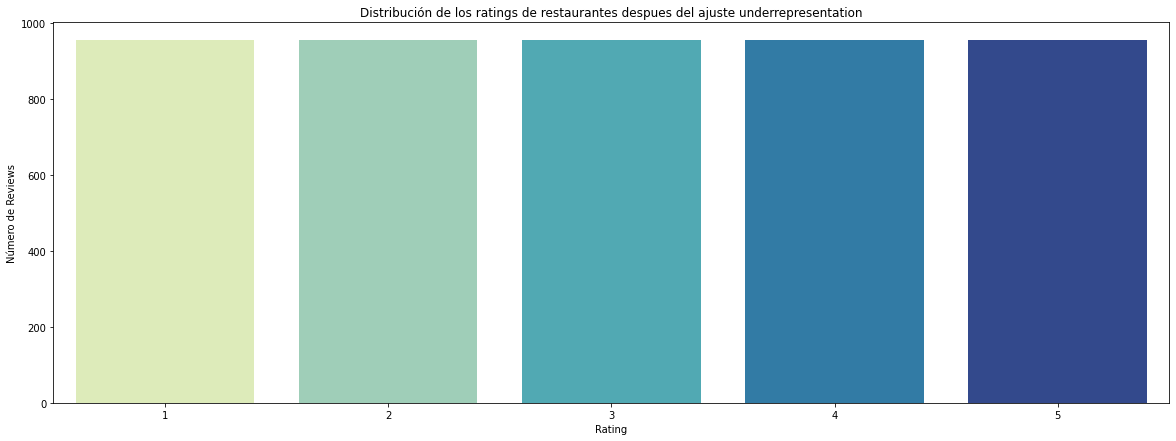

In [ ]:
f, axes = plt.subplots(figsize=(20,7))
ax = sns.countplot(x=trimmed_df["label"], palette="YlGnBu")
ax.set(title="Distribución de los ratings de restaurantes despues del ajuste underrepresentation", \
       xlabel="Rating", ylabel="Número de Reviews")
plt.show()

##TRAIN TEST

The y is our target variable. The X constitutes the characteristics and they are the predictor variables.

We evenly divide the training and test sets and stratify them to ensure that the proportion of classes in both sets is identical.

In [ ]:
from sklearn.model_selection import train_test_split

X = trimmed_df.iloc[:, :-1]
y = trimmed_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.5, random_state=42)

## Scoring and baseline

In [ ]:
from sklearn import metrics

label_shape = np.shape(y_test)
y_baseline = np.full(label_shape, "5")

accuracy_baseline = metrics.accuracy_score(y_test, y_baseline)
f1_score_baseline = metrics.f1_score(y_test, y_baseline, average="micro")

print(f"Baseline Accuracy: {accuracy_baseline*100:.3f}%")
print(f"Baseline F1 Score: {f1_score_baseline:.3f}")

Baseline Accuracy: 20.000%
Baseline F1 Score: 0.200


#Random Forest

In [ ]:
from sklearn.model_selection import train_test_split

X = model_df.iloc[:, :-1]
y = model_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.5, random_state=42)

In [ ]:

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=25, \
                                criterion="entropy", random_state=42)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

Our tuned random forest model obtained a high score in the training data (97%), so we can think that we are dealing with an overfitting. The confusion matrix plotted below highlights how the model almost perfectly classified each review.

In [ ]:
y_pred = forest.predict(X_train)

accuracy = metrics.accuracy_score(y_train, y_pred)
f1_score = metrics.f1_score(y_train, y_pred, average="micro")

print(f"Training Set Accuracy: {accuracy*100:.3f}%")
print(f"Training Set F1 Score: {f1_score:.3f}")

Training Set Accuracy: 97.121%
Training Set F1 Score: 0.971


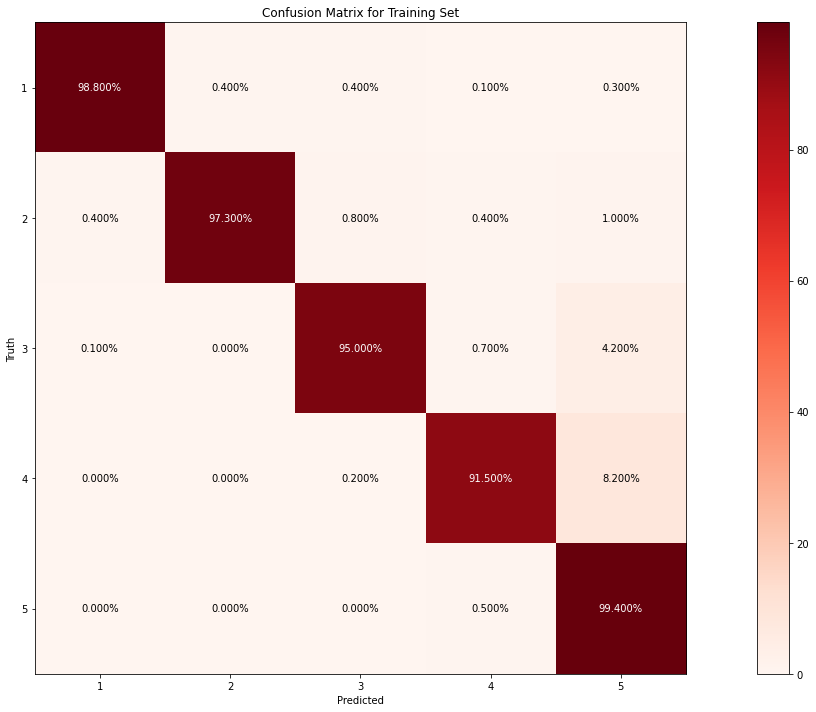

In [ ]:

from sklearn.metrics import confusion_matrix

#create the confusion matrix of the training set
confusion_train = confusion_matrix(y_train, y_pred)
confusion_train = confusion_train.astype("float") / \
                   confusion_train.sum(axis=1)[:, np.newaxis]
confusion_train = np.around(confusion_train, decimals=3)*100

#create confusion matrix heat map
f, axes = plt.subplots(figsize=(20,10))
im = axes.imshow(confusion_train, interpolation="nearest", cmap=plt.cm.Reds)

axes.figure.colorbar(im, ax=axes)
axes.set(title="Confusion Matrix for Training Set", \
         xticks=np.arange(confusion_train.shape[1]), \
         yticks=np.arange(confusion_train.shape[0]), \
         xticklabels=range(1, 6), yticklabels=range(1, 6), \
         xlabel="Predicted", ylabel="Truth")

#add clear annotations to the confusion matrix
threshold = confusion_train.max()/1.5
for i in range(confusion_train.shape[0]):
    for j in range(confusion_train.shape[1]):
        axes.text(j, i, f"{confusion_train[i, j]:.3f}%",
                ha="center", va="center",
                color="white" if confusion_train[i, j] > threshold else "black")
f.tight_layout()
plt.show()

## Crossing Validation

Cross-validation can test for overfitting, and the resulting scores can better reflect the performance of the model on data that has not been seen before. Now we see a score of 71.75% which is better than the overfitting model

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_accuracy = cross_val_score(forest, X_train, y_train, \
                               cv=3, scoring="accuracy")
cross_val_f1 = cross_val_score(forest, X_train, y_train, \
                               cv=3, scoring="f1_micro")

cross_val_accuracy = np.mean(cross_val_accuracy)
cross_val_f1 = np.mean(cross_val_f1)

print(f"Training Set Accuracy: {cross_val_accuracy*100:.3f}%")
print(f"Training Set F1 Score: {cross_val_f1:.3f}")

Training Set Accuracy: 71.752%
Training Set F1 Score: 0.718


#XGBoost

Let's now try to create a model based on a popular boosting technique and see how it compares to our Random Forest model (which is a tree-based bagging approach).

In [ ]:
import xgboost as xgb
y_train=y_train.astype(float)
y_test=y_test.astype(float)
y_train_shifted =y_train-1
y_test_shifted = y_test-1

train_set = xgb.DMatrix(X_train, label=y_train_shifted)
test_set = xgb.DMatrix(X_test, label=y_test_shifted)

parameters = {"max_depth": 10, "eta": 0.2, "silent": 1, \
              "objective": "multi:softprob", "num_class": 5}

boost = xgb.train(parameters, train_set, 100)

In [ ]:
y_pred = boost.predict(train_set)
y_pred = y_pred.argmax(axis=1)
y_pred = y_pred+1

accuracy = metrics.accuracy_score(y_train, y_pred)
f1_score = metrics.f1_score(y_train, y_pred, average="micro")

print(f"Training Set Accuracy: {accuracy*100:.3f}%")
print(f"Training Set F1 Score: {f1_score:.3f}")

Training Set Accuracy: 97.256%
Training Set F1 Score: 0.973


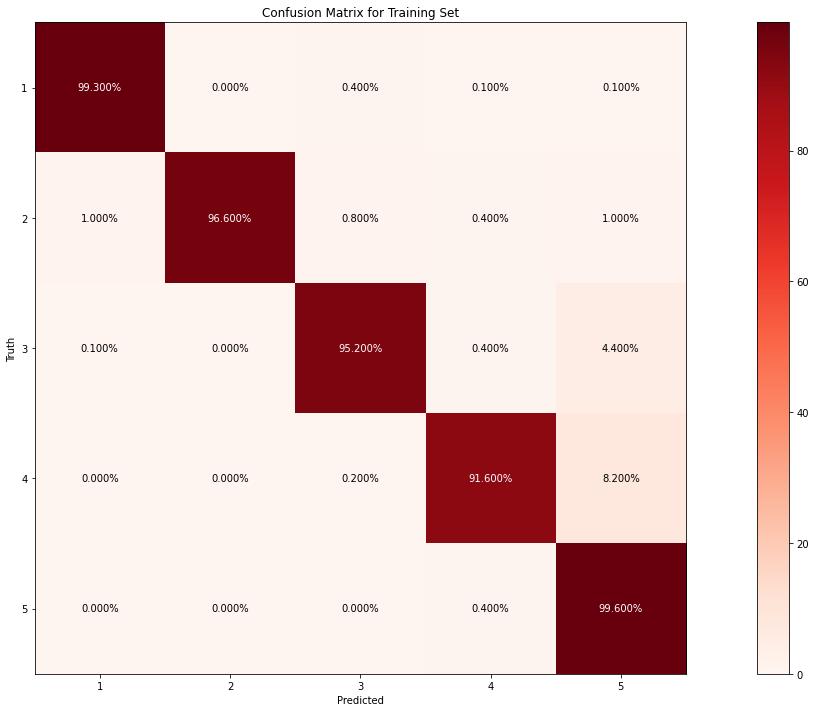

In [ ]:
#create the confusion matrix of the training set
confusion_train = confusion_matrix(y_train, y_pred)
confusion_train = confusion_train.astype("float") / \
                   confusion_train.sum(axis=1)[:, np.newaxis]
confusion_train = np.around(confusion_train, decimals=3)*100

#create confusion matrix heat map
f, axes = plt.subplots(figsize=(20,10))
im = axes.imshow(confusion_train, interpolation="nearest", cmap=plt.cm.Reds)

axes.figure.colorbar(im, ax=axes)
axes.set(title="Confusion Matrix for Training Set", \
         xticks=np.arange(confusion_train.shape[1]), \
         yticks=np.arange(confusion_train.shape[0]), \
         xticklabels=range(1, 6), yticklabels=range(1, 6), \
         xlabel="Predicted", ylabel="Truth")

#add clear annotations to the confusion matrix
threshold = confusion_train.max()/1.5
for i in range(confusion_train.shape[0]):
    for j in range(confusion_train.shape[1]):
        axes.text(j, i, f"{confusion_train[i, j]:.3f}%",
                ha="center", va="center",
                color="white" if confusion_train[i, j] > threshold else "black")
f.tight_layout()
plt.show()

In [ ]:
boost_cv = xgb.cv(dtrain=train_set, params=parameters, nfold=3, \
                  num_boost_round=50, early_stopping_rounds=10, \
                  metrics="merror", as_pandas=True, seed=42)

display(boost_cv.head())

,train-merror-mean,train-merror-std,test-merror-mean,test-merror-std
0,0.139457,0.002837,0.347111,0.010531
1,0.108957,0.003726,0.321600,0.006801
2,0.093209,0.005904,0.308132,0.007617
3,0.080311,0.003622,0.302716,0.007882
4,0.072045,0.003898,0.300720,0.008674


We obtain the cross-validation score of the training set by obtaining the mean merror at the 50th num_boost_round, which is the final boosting phase. Merror is a precision error rate metric for labels of various kinds.

We can get an idea of the precision of the model by subtracting the value of merror from a perfect score of 100%, which gives us a value of 72.98%.

In [ ]:
cross_val_accuracy = boost_cv.iloc[-1,2]
cross_val_accuracy = 1-cross_val_accuracy

print(f"Training Set Accuracy: {cross_val_accuracy*100:.3f}%")

Training Set Accuracy: 72.985%


## XGBoost

#### unbalanced classes

In [ ]:
y_pred = boost.predict(test_set)
y_pred = y_pred.argmax(axis=1)
y_pred = y_pred+1

accuracy = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred, average="micro")

print(f"Test Set Accuracy: {accuracy*100:.3f}%")
print(f"Test Set F1 Score: {f1_score:.3f}")re

Test Set Accuracy: 75.395%
Test Set F1 Score: 0.754


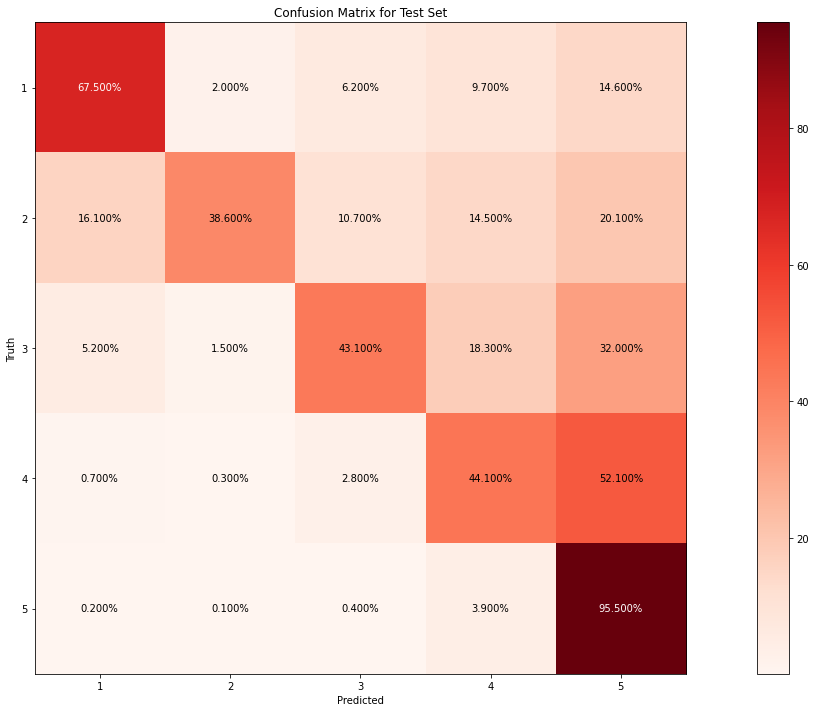

In [ ]:

#crea la matriz de confusión
confusion_train = confusion_matrix(y_test, y_pred)
confusion_train = confusion_train.astype("float") / \
                   confusion_train.sum(axis=1)[:, np.newaxis]
confusion_train = np.around(confusion_train, decimals=3)*100

#crea el mapa de calor de la matriz de confusión
f, axes = plt.subplots(figsize=(20,10))
im = axes.imshow(confusion_train, interpolation="nearest", cmap=plt.cm.Reds)

axes.figure.colorbar(im, ax=axes)
axes.set(title="Confusion Matrix for Test Set", \
         xticks=np.arange(confusion_train.shape[1]), \
         yticks=np.arange(confusion_train.shape[0]), \
         xticklabels=range(1, 6), yticklabels=range(1, 6), \
         xlabel="Predicted", ylabel="Truth")

threshold = confusion_train.max()/1.5
for i in range(confusion_train.shape[0]):
    for j in range(confusion_train.shape[1]):
        axes.text(j, i, f"{confusion_train[i, j]:.3f}%",
                ha="center", va="center",
                color="white" if confusion_train[i, j] > threshold else "black")
f.tight_layout()
plt.show()

### Balanced classes

In [ ]:

X = trimmed_df.iloc[:, :-1]
y = trimmed_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.5, random_state=42)

In [ ]:
y_train=y_train.astype(float)
y_test=y_test.astype(float)
y_train_shifted = y_train-1
y_test_shifted = y_test-1


train_set = xgb.DMatrix(X_train, label=y_train_shifted)
test_set = xgb.DMatrix(X_test, label=y_test_shifted)

y_pred = boost.predict(test_set)
y_pred = y_pred.argmax(axis=1)
y_pred = y_pred+1

accuracy = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred, average="micro")

print(f"Balanced Test Set Accuracy: {accuracy*100:.3f}%")
print(f"Balanced Test Set F1 Score: {f1_score:.3f}")

Balanced Test Set Accuracy: 79.706%
Balanced Test Set F1 Score: 0.797


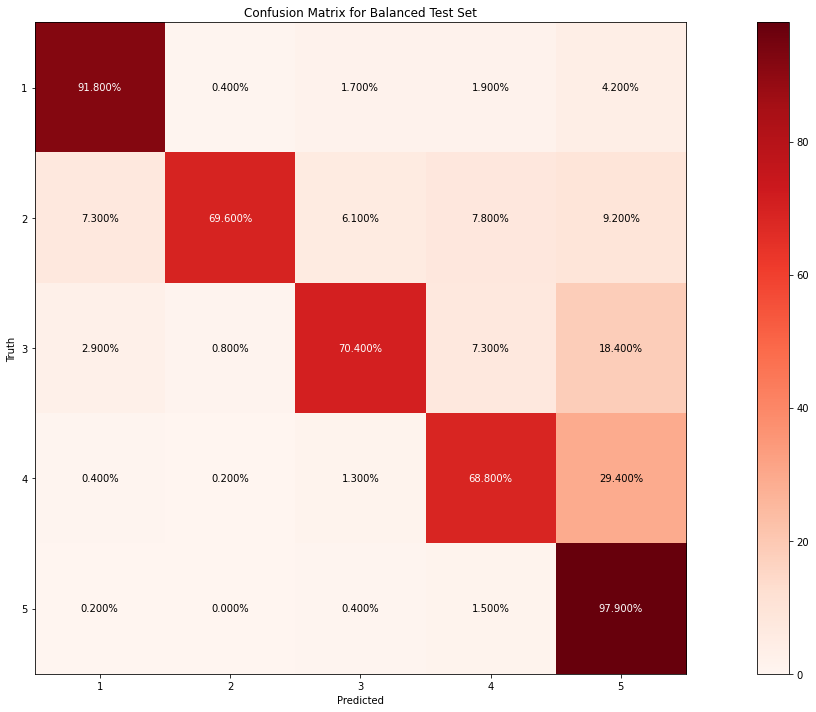

In [ ]:
confusion_train = confusion_matrix(y_test, y_pred)
confusion_train = confusion_train.astype("float") / \
                   confusion_train.sum(axis=1)[:, np.newaxis]
confusion_train = np.around(confusion_train, decimals=3)*100

f, axes = plt.subplots(figsize=(20,10))
im = axes.imshow(confusion_train, interpolation="nearest", cmap=plt.cm.Reds)

axes.figure.colorbar(im, ax=axes)
axes.set(title="Confusion Matrix for Balanced Test Set", \
         xticks=np.arange(confusion_train.shape[1]), \
         yticks=np.arange(confusion_train.shape[0]), \
         xticklabels=range(1, 6), yticklabels=range(1, 6), \
         xlabel="Predicted", ylabel="Truth")

threshold = confusion_train.max()/1.5
for i in range(confusion_train.shape[0]):
    for j in range(confusion_train.shape[1]):
        axes.text(j, i, f"{confusion_train[i, j]:.3f}%",
                ha="center", va="center",
                color="white" if confusion_train[i, j] > threshold else "black")
f.tight_layout()
plt.show()

#Alternative Models

In [ ]:
mnb = MultinomialNB()
bnb = BernoulliNB()
lr = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
svm_lin = SVC(kernel='linear')
svm_poly = SVC(kernel='poly')
svm_rbf = SVC(kernel='rbf')
svm_sig = SVC(kernel='sigmoid')

clasificadores = {'Bernoulli NB': bnb,
                  'Regresion Logistica': lr,
                  'SVM lineal': svm_lin,
                  'SVM polinomico': svm_poly,
                  'SVM Kernel rbf': svm_rbf,
                  'SVM Kernel Sigmoid': svm_sig}


# Ajustamos los modelos y calculamos el accuracy para los datos de entrenamiento
for k, v in clasificadores.items():
    print ('CREANDO MODELO: {clas}'.format(clas=k))
    v.fit(X_train, y_train)

CREANDO MODELO: Bernoulli NB
CREANDO MODELO: Regresion Logistica
CREANDO MODELO: SVM lineal
CREANDO MODELO: SVM polinomico
CREANDO MODELO: SVM Kernel rbf
CREANDO MODELO: SVM Kernel Sigmoid


In [ ]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score

def evaluation(model, name, X_train, y_train, X_test, y_test):
  
    model_dict = {}
    model_dict['name'] = name
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    model_dict['accuracy_train'] = accuracy_score(y_true=y_train, y_pred=y_pred_train)
    model_dict['accuracy_tests'] = accuracy_score(y_true=y_test, y_pred=y_pred_test)
    model_dict['precision_train'] = precision_score(y_true=y_train, y_pred=y_pred_train, average='weighted')
    model_dict['precision_tests'] = precision_score(y_true=y_test, y_pred=y_pred_test, average='weighted')
    model_dict['recall_train'] = recall_score(y_true=y_train, y_pred=y_pred_train, average='weighted')
    model_dict['recall_tests'] = recall_score(y_true=y_test, y_pred=y_pred_test, average='weighted')
    model_dict['f1_train'] = f1_score(y_true=y_train, y_pred=y_pred_train, average='weighted')
    model_dict['f1_tests'] = f1_score(y_true=y_test, y_pred=y_pred_test, average='weighted')

    
    return model_dict


# Calculamos las métricas de los modelos por separado
evaluacion = list()
for key, model in clasificadores.items():
    evaluacion.append(evaluation(model=model, name=key, 
                                 X_train=X_train, y_train=y_train,
                                 X_test=X_test, y_test=y_test))

# Pasamos los resultados a un DataFrame para visualizarlos mejor
df = pd.DataFrame.from_dict(evaluacion)
df.set_index("name", inplace=True)
df

,accuracy_train,accuracy_tests,precision_train,precision_tests,recall_train,recall_tests,f1_train,f1_tests
name,,,,,,,,
Bernoulli NB,0.497275,0.434801,0.489388,0.423429,0.497275,0.434801,0.491003,0.425602
Regresion Logistica,0.563522,0.446960,0.556016,0.436830,0.563522,0.446960,0.558215,0.440513
SVM lineal,0.603774,0.435220,0.601314,0.431641,0.603774,0.435220,0.600558,0.431846
SVM polinomico,0.740461,0.483857,0.774506,0.517052,0.740461,0.483857,0.743975,0.488347
SVM Kernel rbf,0.745073,0.494759,0.745834,0.489733,0.745073,0.494759,0.744327,0.491441
SVM Kernel Sigmoid,0.448637,0.418868,0.452314,0.419961,0.448637,0.418868,0.450127,0.418803


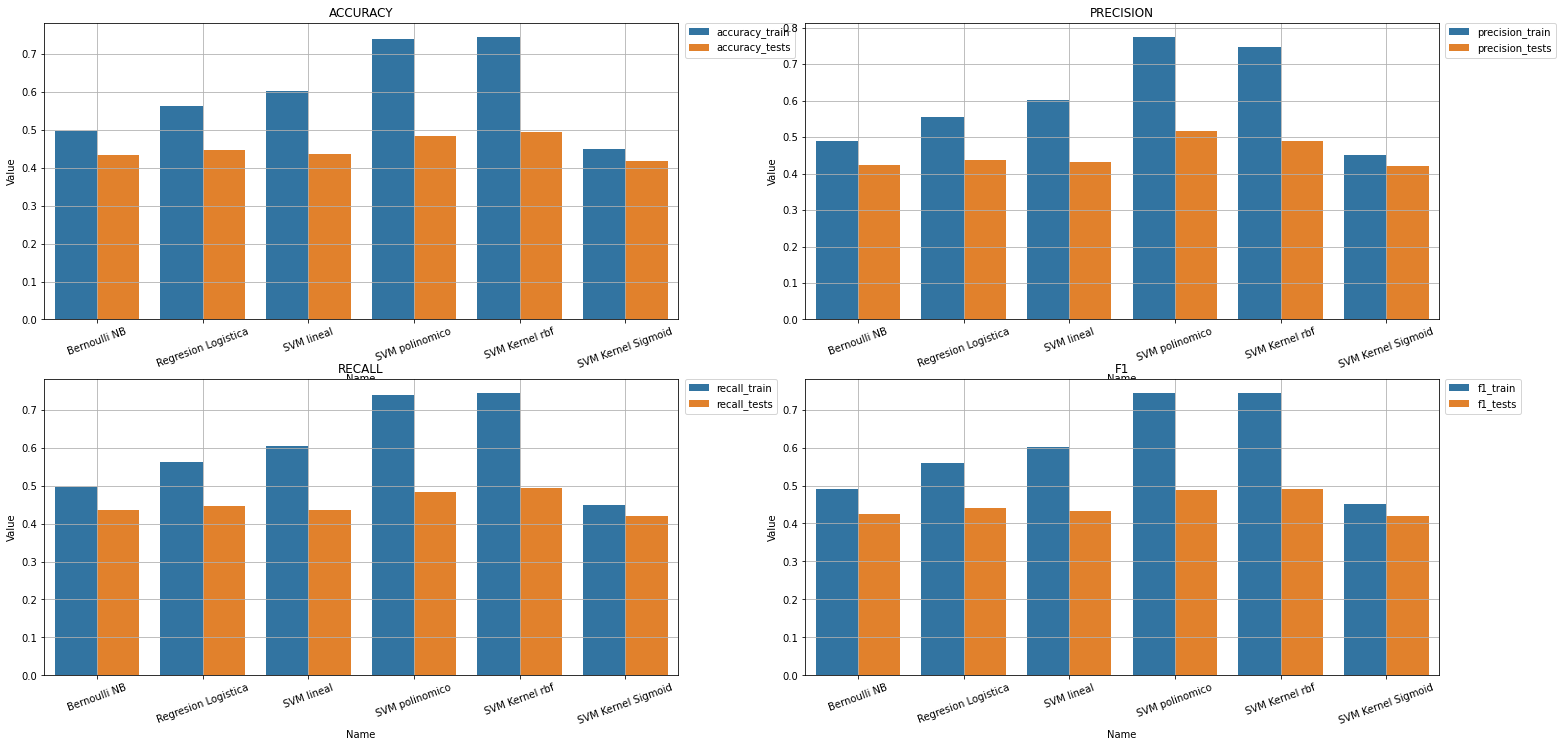

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Métricas a pintar
METRICS = ["accuracy", "precision", "recall", "f1"]

# Transformamos el dataframe para pintar las gráficas con seaborn
df_plot = df.reset_index().melt(id_vars='name').rename(columns=str.title)

plt.figure(figsize=(25, 12))
pos = 1
for metric in METRICS:
    # Filtramos la métrica a pintar
    df_aux = df_plot[df_plot['Variable'].str.contains(metric)]
    
    # Pintamos la gráfica en su posición 2x2
    plt.subplot(2, 2, pos)
    sns.barplot(x='Name', y='Value', hue='Variable', data=df_aux)
    plt.title(metric.upper())
    plt.grid()
    plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
    plt.xticks(rotation=20)
    pos += 1
plt.show()

Obteniendo Matriz de Confusión de: Bernoulli NB
Obteniendo Matriz de Confusión de: Regresion Logistica
Obteniendo Matriz de Confusión de: SVM lineal
Obteniendo Matriz de Confusión de: SVM polinomico
Obteniendo Matriz de Confusión de: SVM Kernel rbf
Obteniendo Matriz de Confusión de: SVM Kernel Sigmoid


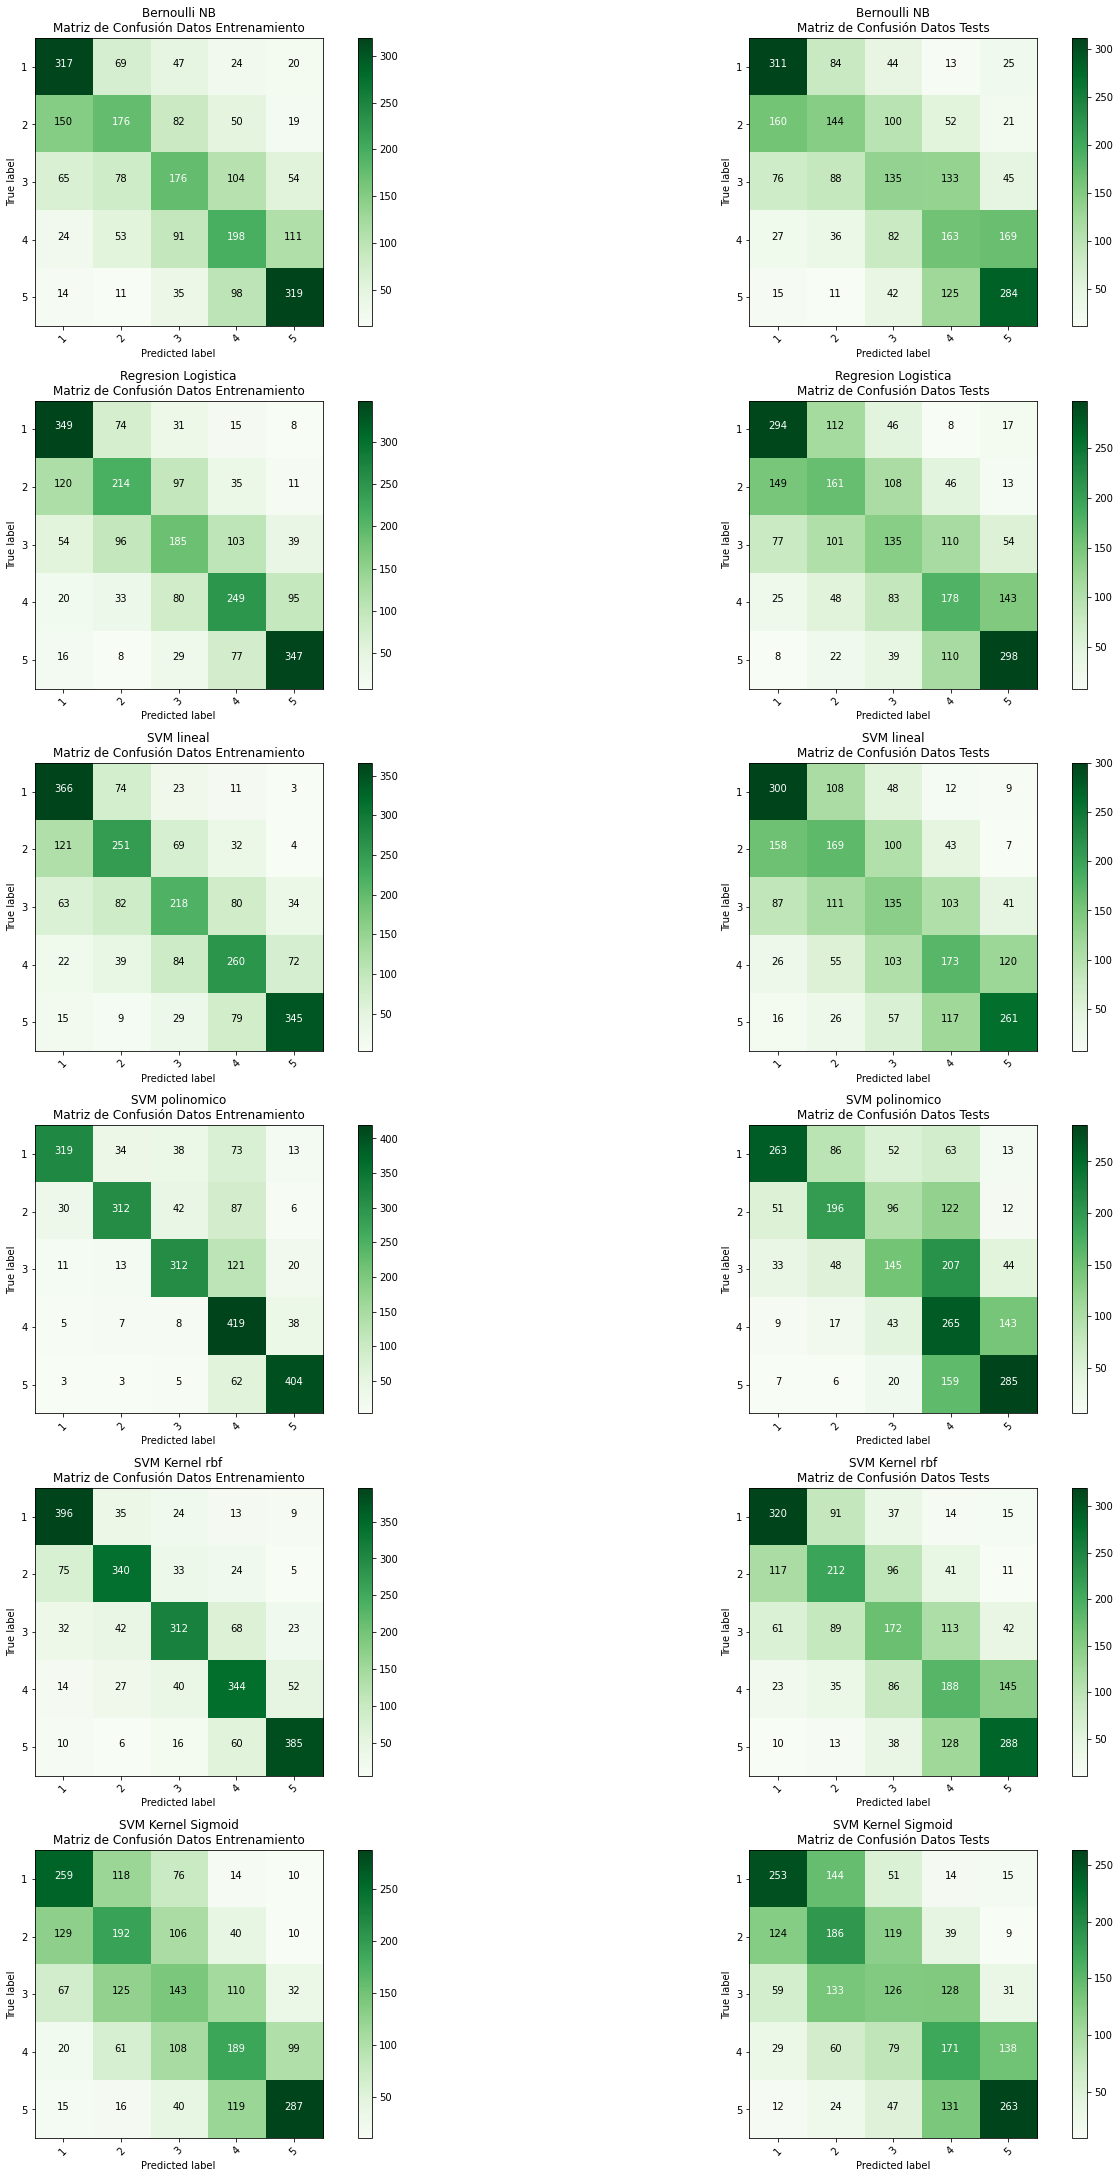

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

from sklearn.metrics import confusion_matrix

# Obtenemos las Matrices de confusión
msc = list()
for k, v in clasificadores.items():
    print ('Obteniendo Matriz de Confusión de: {model}'.format(model=k))
    model = {}
    model['name'] = k
    y_pred_train = v.predict(X_train)
    y_pred_test = v.predict(X_test)
    model['confusion_matrix_train'] = confusion_matrix(y_true=y_train, y_pred=y_pred_train)
    model['confusion_matrix_test'] = confusion_matrix(y_true=y_test, y_pred=y_pred_test)
    msc.append(model)

    
# Definimos el heatmap de la matriz de confusión
def plot_confusion_matrix(cm, classes, title, cmap=plt.cm.):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

# Pintamos las matrices de confusión
plt.figure(figsize=(20, 45))
pos = 0
for mc in msc:
    pos += 1
    plt.subplot(9, 2, pos)
    plot_confusion_matrix(mc['confusion_matrix_train'], classes=['1','2','3','4','5'], 
                          title='{}\nMatriz de Confusión Datos Entrenamiento'.format(mc['name']))
    pos += 1
    plt.subplot(9, 2, pos)
    plot_confusion_matrix(mc['confusion_matrix_test'], classes=['1','2','3','4','5'], 
                          title='{}\nMatriz de Confusión Datos Tests'.format(mc['name'] ))
plt.show()

# We can conclude that the best model still is XGBOOST with an accuracy test of 79.7% which is a good fit

#Word Cloud

Using true labels from the reiews, we can take 50 of the most frequent words in each rating and produce a word cloud.

Now we see that some of the words are descriptive of the rating

In [ ]:
dfsna

,Unnamed: 0,Restaurante,Location,Details,Name,Rating,Date Rate,Review,preprocessed
0,0,Bajel,Av. Paseo de la Reforma 297,Alta cocina,Sandrine Dupriez,5,hace 11 meses,El menu del Bajel es una garantía para los pal...,menu bajel garantia paladares mas sofisticados...
1,1,Bajel,Av. Paseo de la Reforma 297,Alta cocina,Ophélie de Dépasse tes Frontières,5,hace 9 meses,Desde la puerta de entrada hasta el postre la ...,puerta entrada postre experiencia bajel llena ...
2,2,Bajel,Av. Paseo de la Reforma 297,Alta cocina,Joaquín Précoma,5,hace 9 meses,El mejor restaurante en el que he estado en DF...,mejor restaurante df comida mexicana contempor...
3,3,Bajel,Av. Paseo de la Reforma 297,Alta cocina,Ensayos Clinicos,5,2 semanas atrás,DELICIOSO,delicioso
4,4,Bajel,Av. Paseo de la Reforma 297,Alta cocina,Emma Josephine,5,hace 10 meses,Un placer para el paladar y la vista. Delicios...,placer paladar vista deliciosos platillos buen...
...,...,...,...,...,...,...,...,...,...
28082,28082,Bisquets Obregón Pan y Café,Av Observatorio 463A,Restaurante,Fernanda Valenzuela,5,un año atrás,Rico,rico
28083,28083,Bisquets Obregón Pan y Café,Av Observatorio 463A,Restaurante,Sergio Adabel Mendoza Canales,4,un año atrás,Regular,regular
28084,28084,Bisquets Obregón Pan y Café,Av Observatorio 463A,Restaurante,Alberto Urías Garay,3,2 años atrás,Rico pan,rico pan
28085,28085,Bisquets Obregón Pan y Café,Av Observatorio 463A,Restaurante,Jorge Peréa,5,hace 22 horas,Excelente comida,excelente comida


In [ ]:
counts = dfsna['Review'].value_counts()

In [ ]:
counts.index = counts.index.map(str)

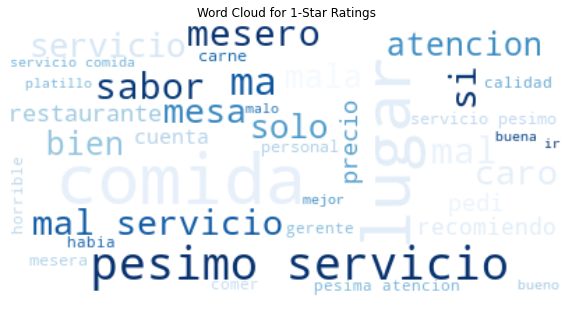

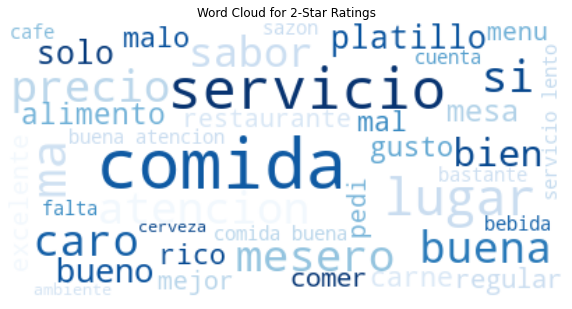

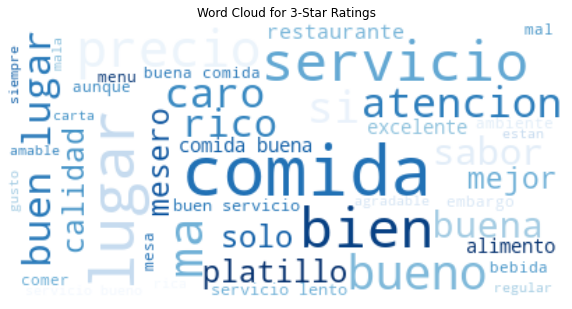

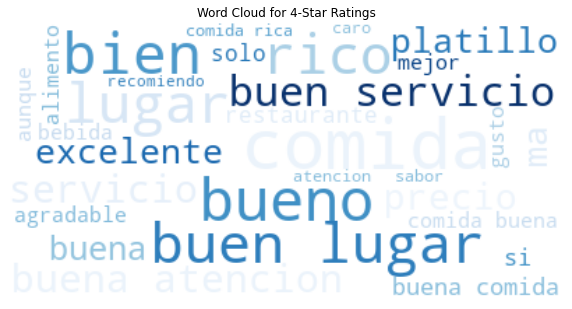

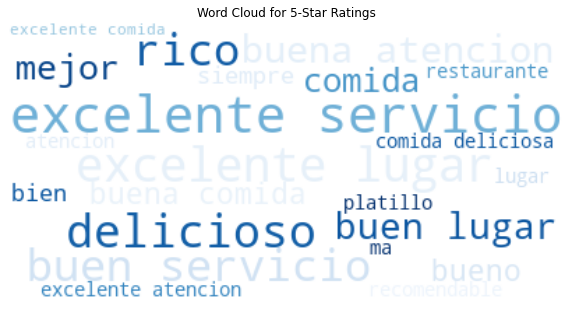

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(stopwords = set(stop_words), min_font_size=10, \
                      max_font_size=50, max_words=50, \
                      background_color="white", colormap = "Blues")

one_star_text = " ".join(dfsna[dfsna["Rating"]=="1"]["preprocessed"].values).lower()
two_star_text = " ".join(dfsna[dfsna["Rating"]=="2"]["preprocessed"].values).lower()
three_star_text = " ".join(dfsna[dfsna["Rating"]=="3"]["preprocessed"].values).lower()
four_star_text = " ".join(dfsna[dfsna["Rating"]=="4"]["preprocessed"].values).lower()
five_star_text = " ".join(dfsna[dfsna["Rating"]=="5"]["preprocessed"].values).lower()

text_list = [one_star_text, two_star_text, three_star_text, \
             four_star_text, five_star_text]

for index, text in enumerate(text_list):
    f, axes = plt.subplots(figsize=(10,7))
    wordcloud.generate(text)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f"Word Cloud for {index+1}-Star Ratings")
    plt.axis("off")
    plt.show()
    